# ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
<br>

    1. Visualize the Time Series Data
    2. Make the time series data stationary
    3. Plot the Correlation and AutoCorrelation Charts
    4. Construct the ARIMA Model or Seasonal ARIMA based on the data
    5. Use the model to make predictions
Let's go through these steps!

#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
champagne = pd.read_csv('champagne.csv')

In [3]:
champagne.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
champagne.columns = ['Months', 'Sales']

In [5]:
champagne.head()

,Months,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [7]:
champagne.isnull().value_counts()

Months  Sales
False   False    105
dtype: int64

In [8]:
champagne['Months'].isnull().value_counts()

False    105
Name: Months, dtype: int64

In [9]:
champagne['Sales'].isnull().value_counts()

False    105
Name: Sales, dtype: int64

In [10]:
champagne.tail()

,Months,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


So, we have only one row with null values, lets drop null

In [17]:
print(champagne.shape)

(105, 2)


In [18]:
## for timeseries we need date time format data
champagne['Months'] = pd.to_datetime(champagne['Months'])
champagne.head()

,Months,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [20]:
champagne.set_index('Months', inplace=True)  ## classic format of timeseries data
champagne.head()

,Sales
Months,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [21]:
## Now lets dive deep into sales for each month. 
## Start with data describe
champagne.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [49]:
from scipy.stats import norm
import statistics
import numpy as np 
data =champagne['Sales']
mean = statistics.mean(champagne['Sales'])
std = statistics.stdev(champagne['Sales'])

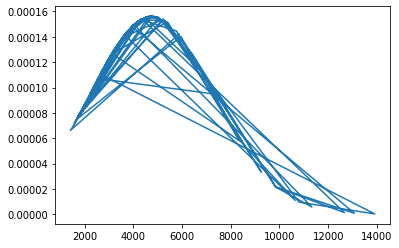

In [57]:
plt.plot(data, norm.pdf(data, mean, std))
plt.show()

<AxesSubplot:xlabel='Months'>

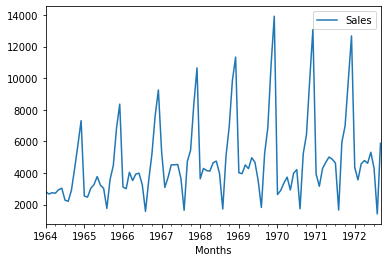

In [31]:
champagne.plot()

In [59]:
## Test for Stationary data
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(champagne['Sales'])

In [63]:
## Null Hypothesis (H0): Data is not stationary
## Alternate Hypothesis (H1): Data is Stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label, ":", str(value))
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis hence reject null hypothesis. Data is having no unit root and is stationary") 
    else: 
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [64]:
adfuller_test(champagne['Sales'])

ADF Test Statistic : -1.8335930563276184
p-value : 0.36391577166024713
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [65]:
champagne['Sales'].head()

Months
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

In [66]:
champagne['Sales'].shift(1).head()

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
Name: Sales, dtype: float64

In [67]:
champagne['Sales First Difference'] = champagne['Sales'] - champagne['Sales'].shift(1)

In [68]:
champagne['Sales Seasonal Difference'] = champagne['Sales']- champagne['Sales'].shift(12)

In [69]:
champagne.head()

,Sales,Sales First Difference,Sales Seasonal Difference
Months,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN


In [71]:
adfuller_test(champagne['Sales First Difference'].dropna())

ADF Test Statistic : -7.18989644805098
p-value : 2.519620447387365e-10
#Lags Used : 11
Number of Observations Used : 92
Strong evidence against null hypothesis hence reject null hypothesis. Data is having no unit root and is stationary


In [72]:
adfuller_test(champagne['Sales Seasonal Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against null hypothesis hence reject null hypothesis. Data is having no unit root and is stationary


<AxesSubplot:xlabel='Months'>

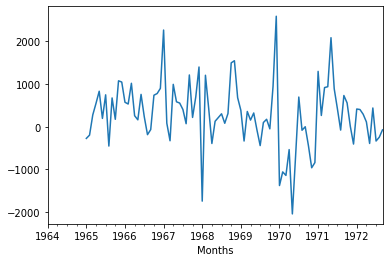

In [73]:
champagne['Sales Seasonal Difference'].plot()

# Auto Regressive Model 

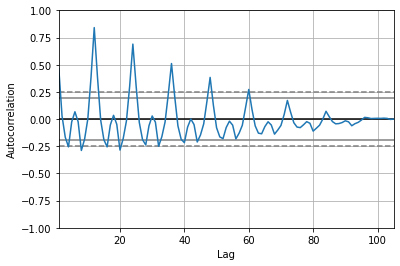

In [76]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(champagne['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF. <br>

For an AR model, the theoretical PACF “shuts off” past the order of the model. <br>
The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. <br>
Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. <br>
By the “order of the model” we mean the most extreme lag of x that is used as a predictor.<br>
Identification of an MA model is often best done with the ACF rather than the PACF.<br>
<br>
For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
<br>
p,d,q p AR model lags d differencing q MA lags

In [83]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

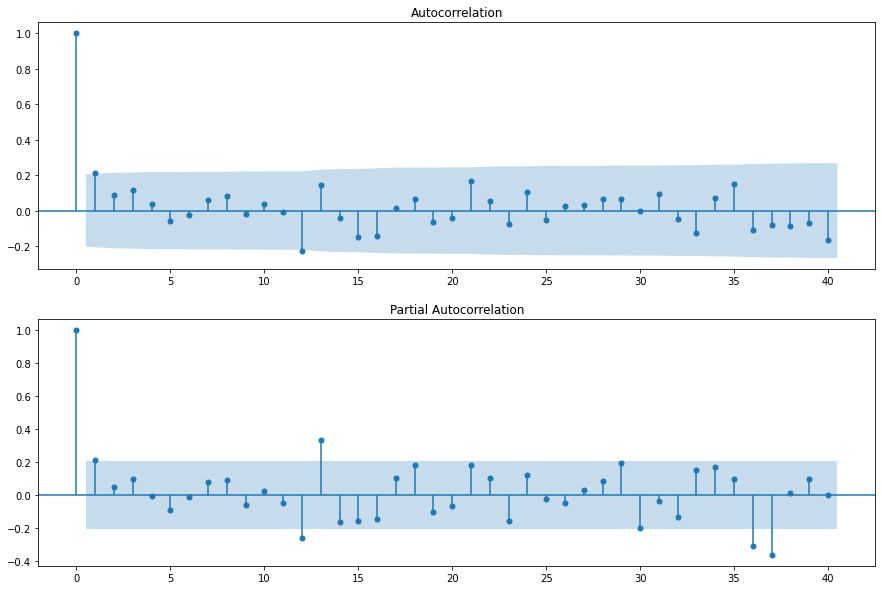

In [86]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(champagne['Sales Seasonal Difference'].iloc[13:], lags = 40, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(champagne['Sales Seasonal Difference'].iloc[13:], lags = 40, ax= ax2)

In [91]:
# for non seasional data
from statsmodels.tsa.arima.model import ARIMA

In [92]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [93]:
model = ARIMA(champagne['Sales'], order = (1,1,1))
model_fit = model.fit()

C:\Users\Shradha\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Shradha\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Shradha\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 11 Jun 2021   AIC                           1911.627
Time:                        01:14:56   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Months'>

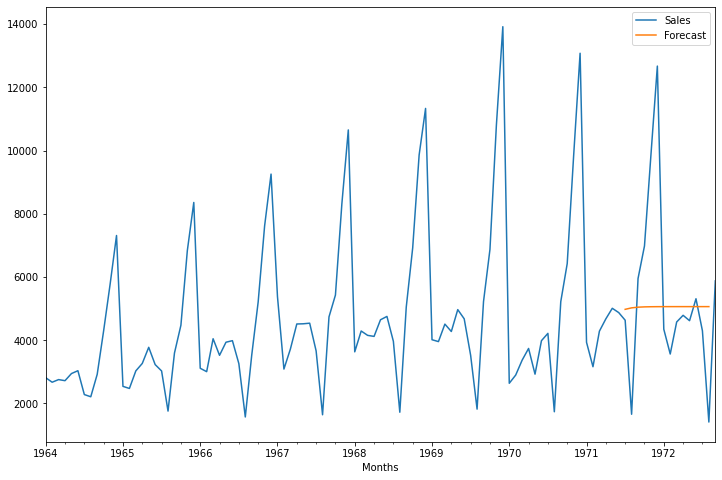

In [96]:
champagne['Forecast'] = model_fit.predict(start= 90, end = 103, dynamic = True)
champagne[['Sales','Forecast']].plot(figsize = (12,8))

In [98]:
import statsmodels.api as smi

model=smi.tsa.statespace.SARIMAX(champagne['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Shradha\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Shradha\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Months'>

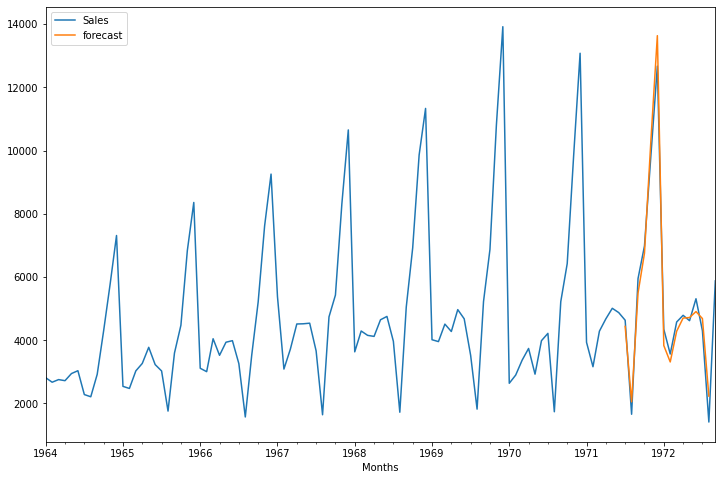

In [99]:
champagne['forecast']=results.predict(start=90,end=103,dynamic=True)
champagne[['Sales','forecast']].plot(figsize=(12,8))

In [101]:
from pandas.tseries.offsets import DateOffset
future_dates=[champagne.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [102]:
future_datest_champagne=pd.DataFrame(index=future_dates[1:],columns=champagne.columns)

In [104]:
future_datest_champagne.tail()

,Sales,Sales First Difference,Sales Seasonal Difference,Forescast,Forecast,forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
future_champagne=pd.concat([champagne,future_datest_champagne])

<AxesSubplot:>

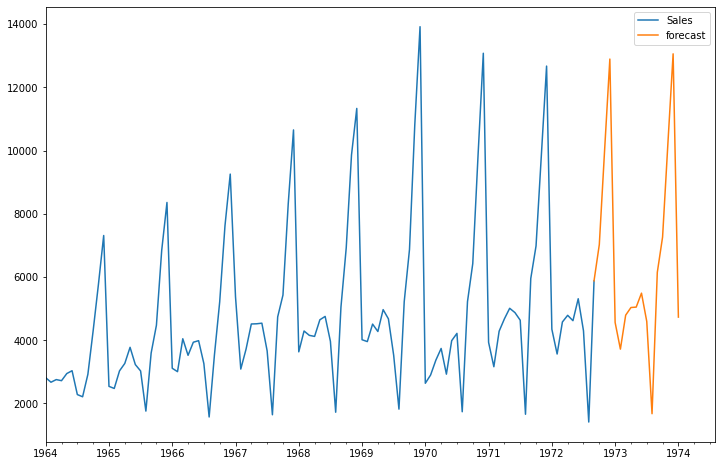

In [106]:
future_champagne['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_champagne[['Sales', 'forecast']].plot(figsize=(12, 8))